In [5]:
import v20
import pandas
import configparser

In [6]:
parser = configparser.ConfigParser()

In [7]:
parser.read('oanda.cfg')

['oanda.cfg']

In [8]:
ctx = v20.Context(
    parser['oanda']['hostname'],
    parser['oanda']['port'],
    parser['oanda']['ssl'],
    token = parser['oanda']['access_token'],
    application = parser['oanda']['application'],
    datetime_format = parser['oanda']['date_format']
)

In [9]:
instrument = 'EUR_USD'
kwargs = {}

In [10]:
kwargs['granularity'] = 'M1'
kwargs['price'] = 'MBA'

In [14]:
response = ctx.instrument.candles(instrument,**kwargs)

In [22]:
if response.status == 200:
    closeAsk = []
    time = []
    for candle in response.get('candles',200):
        closeAsk.append(getattr(candle,'ask',None).c)
        time.append(getattr(candle,'time',None))

In [24]:
df = pandas.DataFrame({'closeAsk':closeAsk,'time':time}).set_index('time')

In [25]:
df.index = pandas.DatetimeIndex(df.index)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 500 entries, 2019-01-15 08:01:00 to 2019-01-15 16:20:00
Data columns (total 1 columns):
closeAsk    500 non-null float64
dtypes: float64(1)
memory usage: 7.8 KB


In [27]:
df.head()

,closeAsk
time,
2019-01-15 08:01:00,1.14721
2019-01-15 08:02:00,1.14710
2019-01-15 08:03:00,1.14712
2019-01-15 08:04:00,1.14742
2019-01-15 08:05:00,1.14697


In [28]:
import numpy as np

In [29]:
df['return'] = np.log(df.closeAsk/df.closeAsk.shift(1))

In [32]:
columns = []

for time in [15,30,60,120]:
    column = 'time%s'%time
    df[column] = np.sign(df['return'].rolling(time).mean())
    columns.append(column)

In [36]:
%matplotlib inline

In [44]:
strats = ['return']

In [45]:
for col in columns:
    strat = 'strategy %s'%col
    df[strat] = df[col].shift(1)*df['return']
    strats.append(strat)

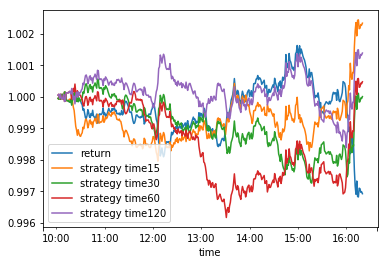

In [46]:
df[strats].dropna().cumsum().apply(np.exp).plot()

In [47]:
strats

['return',
 'strategy time15',
 'strategy time30',
 'strategy time60',
 'strategy time120']